## 18. 홀짝 연결 리스트

- 연결 리스트를 홀수 노드 다음에 짝수 노드가 오도록 재구성하라. 

  - ⚠Disclaimer⚠: 변수 홀짝이 아니라 인덱스 홀짝임

- 공간 복잡도 $O(1)$, 시간 복잡도 $O(n)$에 풀이하라.

  e.g.1) 
    
    - 입력
      
      $1→2→3→4→5→$ NULL

    - 출력

      $1→3→5→2→4→$ NULL

  e.g.2) 
    
    - 입력
      
      $2→1→3→5→6→4→7→$ NULL

    - 출력

      $2→3→6→7→1→5→4→$ NULL

### 풀이 1. 반복 구조로 홀짝 노드 처리

- 연결 리스트를 리스트로 바꾸고 파이썬 리스트 기능을 사용하면 더 빠름 (내장 함수는 C로 구현되어있기 때문)

- 하지만 이렇게 풀면 오프라인 코테의 경우 다시 풀어달라는 요청을 받을 수도 있으니 (~꼰대~) 여러가지 풀이법을 다 알아둘 것

- 시간 복잡도: 시간 얼마나 쓰냐

- 공간 복잡도: 메모리 얼마나 쓰냐

- 요즘은 컴 성능들이 좋아서 일반적으로 시간 복잡도만 따져도 충분함 

- 공간 복잡도 $O(1)$: 상수개의 변수만 사용. 재귀같은거 쓰면 스택에 계속 쌓이므로 공간복잡도 $O(n)$ 이상

- 시간 복잡도: $O(n)$: 뽀문 1개

In [44]:
# single linked list
# author: https://blex.me/@baealex/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%EA%B5%AC%ED%98%84%ED%95%9C-%EC%9E%90%EB%A3%8C%EA%B5%AC%EC%A1%B0-%EC%97%B0%EA%B2%B0-%EB%A6%AC%EC%8A%A4%ED%8A%B8
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

    def __str__(self):
        return str(self.data)

class SingleLinkedList:
    def __init__(self, data):
        new_node = Node(data)
        self.head = new_node
        self.list_size = 1

    def __str__(self):
        print_list = '[ '
        node = self.head
        while True:
            print_list += str(node)
            if node.next == None:
                break
            node = node.next
            print_list += ', '
        print_list += ' ]'
        return print_list

    def insertFirst(self, data):
        new_node = Node(data)
        temp_node = self.head
        self.head = new_node
        self.head.next = temp_node
        self.list_size += 1

    def insertMiddle(self, num, data):
        if self.head.next == None:
            insertLast(data)
            return
        node = self.selectNode(num)
        new_node = Node(data)
        temp_next = node.next
        node.next = new_node
        new_node.next = temp_next
        self.list_size += 1

    def insertLast(self, data):
        node = self.head
        while True:
            if node.next == None:
                break
            node = node.next

        new_node = Node(data)
        node.next = new_node
        self.list_size += 1

    def selectNode(self, num):
        if self.list_size < num:
            print("Overflow")
            return
        node = self.head
        count = 0
        while count < num:
            node = node.next
            count += 1
        return node

    def deleteNode(self, num):
        if self.list_size < 1:
            return # Underflow
        elif self.list_size < num:
            return # Overflow

        if num == 0:
            self.deleteHead()
            return
        node = self.selectNode(num - 1)
        node.next = node.next.next
        del_node = node.next
        del del_node

    def deleteHead(self):
        node = self.head
        self.head = node.next
        del node

    def size(self):
        return str(self.list_size)

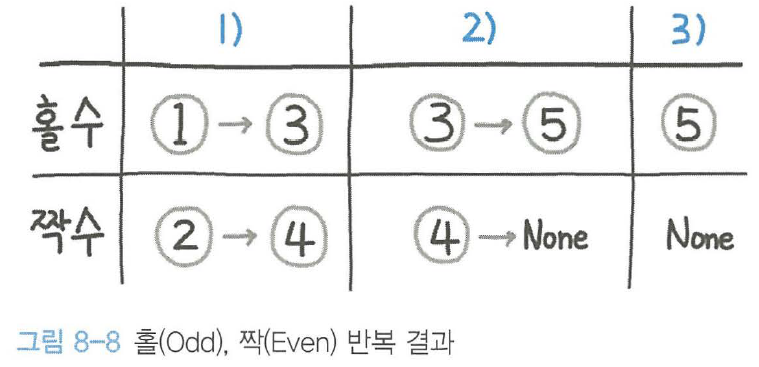

In [85]:
def oddEvenList(head: Node) -> Node:
    # 예외 처리
    if head is None:
        return None
    
    print(head)
    print(head.next)
    print(head.next.next)
    print(head.next.next.next)   
    print(head.next.next.next.next)
    print(" ")
    odd = head # 1
    even = head.next # 2
    even_head = head.next # 2, 짝수의 head

    # 반복하면서 홀짝 노드 처리
    while even and even.next:
        odd.next, even.next = odd.next.next, even.next.next
        odd, even = odd.next, even.next

    # 홀수 노드의 마지막을 짝수 헤드로 연결
    odd.next = even_head

    print(head)
    print(head.next)
    print(head.next.next)
    print(head.next.next.next)   
    print(head.next.next.next.next)
    print(" ")
    return head


example_list = SingleLinkedList(1)
example_list.insertLast(2)
example_list.insertLast(3)
example_list.insertLast(4)
example_list.insertLast(5)
print(example_list)

print(oddEvenList(example_list.head))

[ 1, 2, 3, 4, 5 ]
1
2
3
4
5
 
1
3
5
2
4
 
1


## 주의

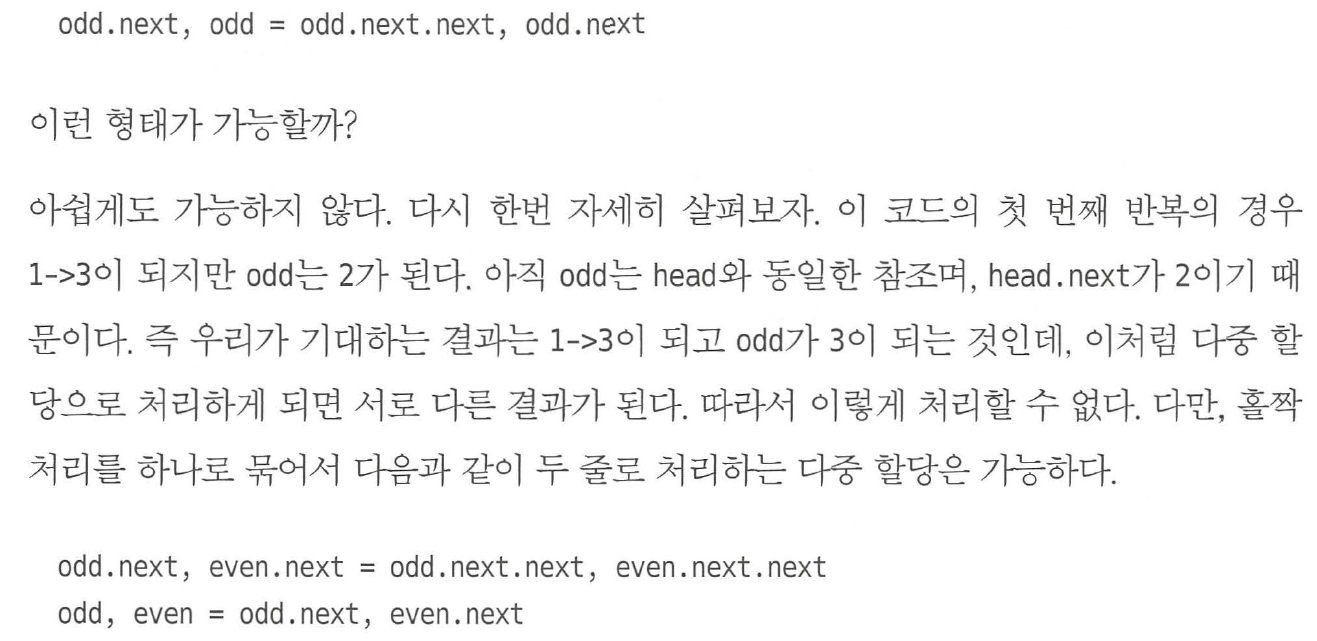